# Chapter 5: SVMs

### Load dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, (2,3)]
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

## Linear SVM

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

### Plot SVM Prediction

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


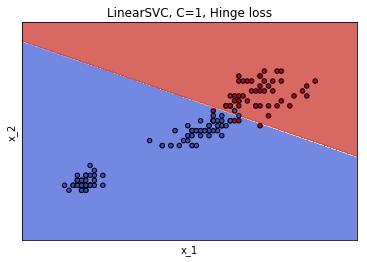

In [6]:
def plot_contours(clf, X, y, title=''):
    fig, ax = plt.subplots()
    X0, X1 = X[:, 0], X[:, 1]
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('x_2')
    ax.set_xlabel('x_1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


plot_contours(svm_clf,X,y,'LinearSVC, C=1, Hinge loss')

#### Notes:
* C parameter controls the decision boundary margin size.
* Higher C means a smaller margin. Overfitting could be an issue.
* Small C (say 0.1) means a wider margin, thus produces more margin violations but better generalization in many cases.

## Polynomial SVMs

### Adding polynomial features to Linear SVM (inefficient)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


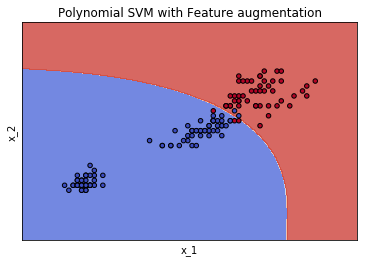

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
polynomial_svm_clf.fit(X, y)

plot_contours(polynomial_svm_clf,X,y,'Polynomial SVM with Feature augmentation')

### LinearSVM with polynomial features via Kernel trick

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


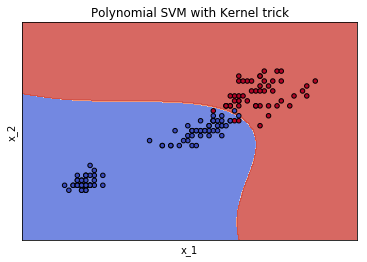

In [12]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=5))
    ))
poly_kernel_svm_clf.fit(X, y)

plot_contours(poly_kernel_svm_clf,X,y,'Polynomial SVM with Kernel trick')

### RBF (Radial Basis Features / Landmarks technique) kernel

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


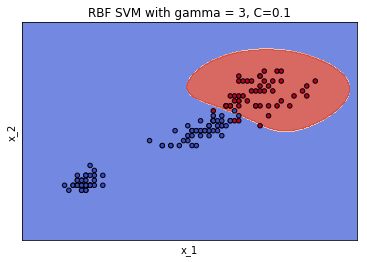

In [28]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=3.0, C=0.1))
))
rbf_kernel_svm_clf.fit(X, y)

plot_contours(rbf_kernel_svm_clf,X,y,'RBF SVM with gamma = 3, C=0.1')

#### Note:
* Increasing gamma makes the bell-shape curve narrower, and as a result each instance’s range of influence is smaller.
* Always try the linear kernel first (remember that LinearSVC is much faster than SVC(ker nel="linear")), especially if the training set is very large or if it has plenty of features. If the training set is not too large, try the Gaussian RBF kernel as well; it works well in most cases. Then also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

### Complexity:
* LinearSVC: training time complexity is $O(m \times n)$ with $m$ samples and $n$ features.
* SVC class: training time complexity is usually between $O(m^2 \times n)$ and $O(m^3 \times n)$.
* Conclusion: scales well when there are many features but bad when there are many samples.